In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

# excel file to read the accelerometer data from 
file_name = '/Users/Maharshi/Downloads/Sample_XYZ.xlsx'

# Read only the X, Y and Z columns for each of 5 activities. 
# Here the array index indicates the kind of activity(0-4).
data = []
for i in range(0, 6):
    temp = pd.read_excel(file_name, sheetname='Sheet1', parse_cols=[4*i+1,4*i+2,4*i+3])
    data.append(temp)

# print(data[0])
# type(data)
print(data[0].shape[0])

27900


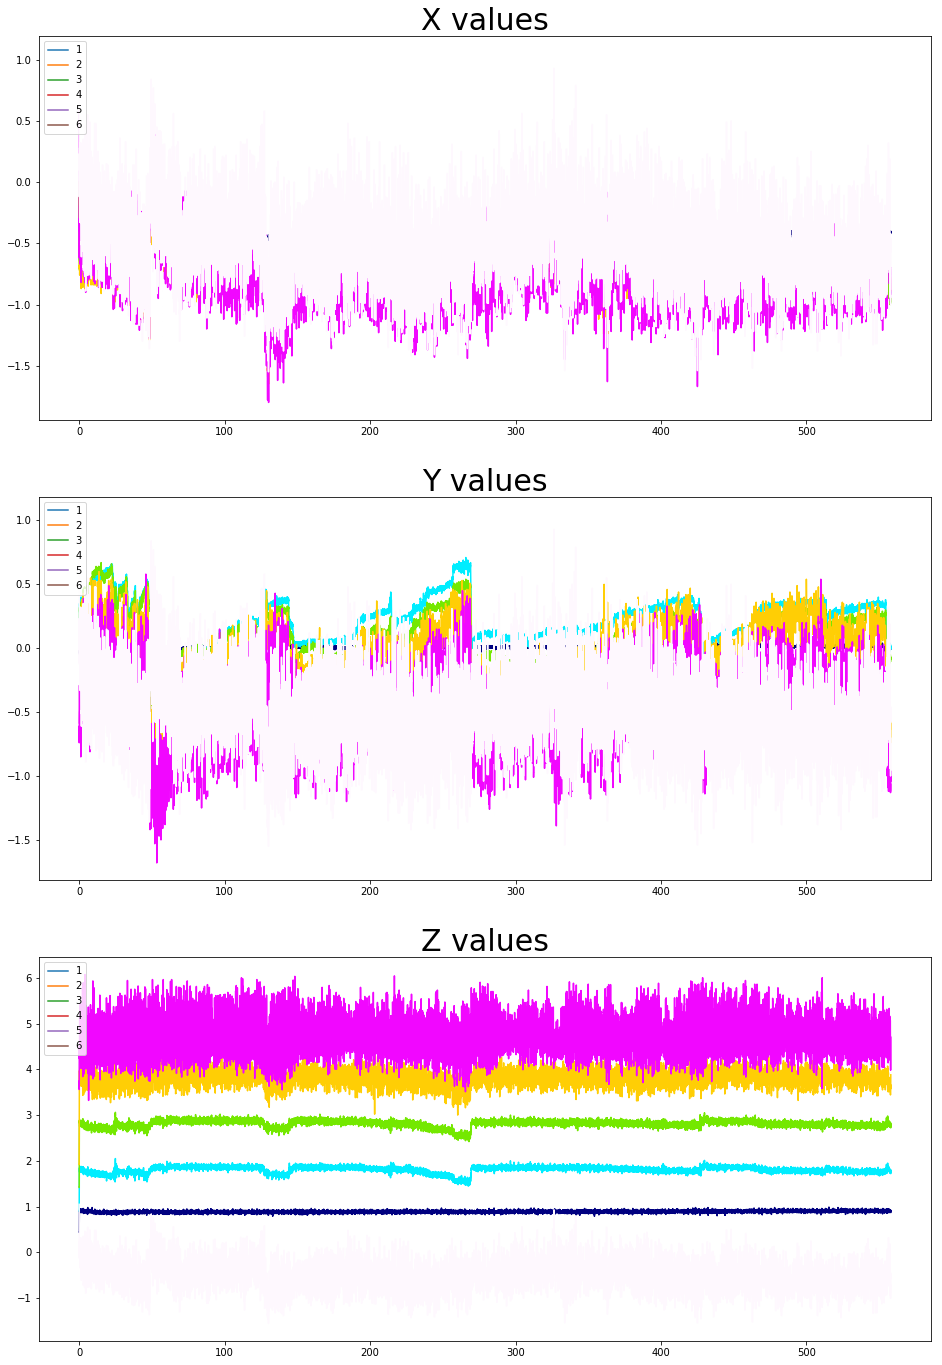

In [10]:
# plot the data to figure out the features that can help properly classify the data

import matplotlib.pyplot as plt

# read the time stamp from the excel file
x = pd.read_excel(file_name, sheetname='Sheet1', parse_cols=[0])

plot_x = np.row_stack((data[0]['X'], data[1]['X'], data[2]['X'], data[3]['X'], data[4]['X'], data[5]['X'],)) 
plot_y = np.row_stack((data[0]['Y'], data[1]['Y'], data[2]['Y'], data[3]['Y'], data[4]['Y'], data[5]['Y'],))
plot_z = np.row_stack((data[0]['Z'], data[1]['Z'], data[2]['Z'], data[3]['Z'], data[4]['Z'], data[5]['Z'],))

x_stack = np.cumsum(plot_x, axis=0)  
y_stack = np.cumsum(plot_y, axis=0)
z_stack = np.cumsum(plot_z, axis=0)

fig = plt.figure(figsize=(16,24))

# plot X values for every activity
ax1 = fig.add_subplot(311)
ax1.plot(x, x_stack[0,:], label=1)
ax1.plot(x, x_stack[1,:], label=2)
ax1.plot(x, x_stack[2,:], label=3)
ax1.plot(x, x_stack[3,:], label=4)
ax1.plot(x, x_stack[4,:], label=5)
ax1.plot(x, x_stack[5,:], label=6)
ax1.legend(loc=2)
ax1.set_title('X values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])


# plot Y values for every activity
ax2 = fig.add_subplot(312)
ax2.plot(x, y_stack[0,:], label=1)
ax2.plot(x, y_stack[1,:], label=2)
ax2.plot(x, y_stack[2,:], label=3)
ax2.plot(x, y_stack[3,:], label=4)
ax2.plot(x, y_stack[4,:], label=5)
ax2.plot(x, x_stack[5,:], label=6)
ax2.legend(loc=2)
ax2.set_title('Y values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])

    
# plot Z values for every activity
ax3 = fig.add_subplot(313)
ax3.plot(x, z_stack[0,:], label=1)
ax3.plot(x, z_stack[1,:], label=2)
ax3.plot(x, z_stack[2,:], label=3)
ax3.plot(x, z_stack[3,:], label=4)
ax3.plot(x, z_stack[4,:], label=5)
ax3.plot(x, x_stack[5,:], label=6)
ax3.legend(loc=2)
ax3.set_title('Z values', fontsize= 30)

colormap = plt.cm.gist_ncar 
colors = [colormap(i) for i in np.linspace(0, 1,len(ax3.lines))]
for i,j in enumerate(ax3.lines):
    j.set_color(colors[i])

# plt.savefig('smooth_plot.png')

In [11]:
# window size i.e. number of points to consider while extracting features
points = 300

X_train = []
Y_train = []

# calculate features like mean and std across all activites along a particular window size
for i in range(0, 6):
    
    for j in range(0, data[i].shape[0]//points):
        
#         calculate the mean and standard deviation for a window of points value
        mean_x = np.mean(data[i]['X'][j*points:j*points+points])
        mean_y = np.mean(data[i]['Y'][j*points:j*points+points])
        mean_z = np.mean(data[i]['Z'][j*points:j*points+points])
        
        std_x = np.std(data[i]['X'][j*points:j*points+points])
        std_y = np.std(data[i]['Y'][j*points:j*points+points])
        std_z = np.std(data[i]['Z'][j*points:j*points+points])

        median_x = np.median(data[i]['X'][j*points:j*points+points])
        median_y = np.median(data[i]['Y'][j*points:j*points+points])
        median_z = np.median(data[i]['Z'][j*points:j*points+points])
        
        X_train.append((mean_x, mean_y, mean_z, std_x, std_y, std_z, median_x, median_y, median_z))
        Y_train.append(i+1)

In [15]:
print(np.array(X_train).shape)
print (data[0].shape[0]//points)

(558, 9)
93


In [16]:
#change to matrix
X = np.array(X_train) 
Y = np.array(Y_train)
print ("hello")

hello


###### Split data into test(1/3) and training(2/3) set 

In [17]:
from sklearn import cross_validation

#separate data into test and training set
print("Splitting data into 2/3 training set & 1/3 test set...")
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.33, random_state=33)

Splitting data into 2/3 training set & 1/3 test set...


/Users/Maharshi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn import svm
from sklearn import metrics

In [28]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, Y_train)
Y_hat = lin_clf.predict(X_test)

print(Y_test)
print(Y_hat)
print(Y_hat==Y_test)
for i, w in enumerate(Y_hat):
    if (Y_hat[i]!= Y_test[i]):
        print (Y_test[i])
metrics.accuracy_score(Y_hat, Y_test)
print(lin_clf.score(X_test, Y_test))

[5 5 2 6 5 6 5 4 2 2 2 1 5 2 1 3 1 5 6 6 1 2 1 6 5 1 6 1 2 3 2 2 5 6 3 5 2
 4 1 1 1 6 5 3 6 2 2 4 2 4 3 6 6 6 6 5 5 6 5 5 1 1 3 5 6 2 3 3 5 3 1 1 1 6
 5 5 4 6 1 6 3 6 5 4 5 2 4 3 3 3 6 4 5 6 2 4 4 1 4 2 3 4 6 4 3 2 1 3 3 3 5
 1 6 1 5 4 2 2 1 1 5 4 2 4 2 4 2 2 4 2 4 1 4 2 6 2 6 3 5 1 4 2 5 5 5 6 1 4
 3 6 6 3 4 6 4 4 2 4 3 1 2 3 5 4 4 4 3 1 1 6 1 3 1 1 1 5 4 5 5 2 1 6 2 6 6]
[5 5 2 6 5 6 5 4 2 2 2 1 5 2 1 3 1 5 6 6 1 2 1 6 5 1 6 1 2 3 2 2 5 6 3 5 2
 4 1 1 1 6 5 3 6 2 2 4 2 4 3 6 6 6 6 5 5 6 5 5 1 1 3 5 6 2 3 3 5 3 1 1 1 6
 5 5 4 6 1 6 3 6 5 4 5 2 4 3 3 3 6 4 5 6 3 4 3 1 4 2 3 4 6 4 3 2 1 3 3 3 5
 1 6 1 5 4 2 2 1 1 5 4 2 4 2 4 2 2 4 2 4 1 4 2 6 2 6 3 5 1 4 4 5 5 5 6 1 4
 3 6 6 3 4 6 4 4 2 4 3 1 2 3 5 4 4 4 3 1 1 6 1 3 1 1 1 5 4 5 5 2 1 6 2 6 6]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  Tru

In [24]:
# try with varying different parameters like C, etc.
C = [0.1, 0.2, 0.5, 1]
for i in C:
    linear_test_score = svm.SVC(kernel='linear', C=i).fit(X_train, Y_train).score(X_test, Y_test)
    print (linear_test_score)

0.740540540541
0.805405405405
0.989189189189
0.989189189189
